# Database Design

## OLTP and OLAP

**OLTP:** Online Transaction Processing (oriented to transactions)

**OLAP:** Online Analytical Processing (oriented to analytics)

**OLTP tasks:**
- Find te price of a book
- Update latest customer transaction
- Keep track of employee hours

**OLAP tasks:**
- Calculate books with best profit margin
- Find most loyal customers
- Decide employee of the month

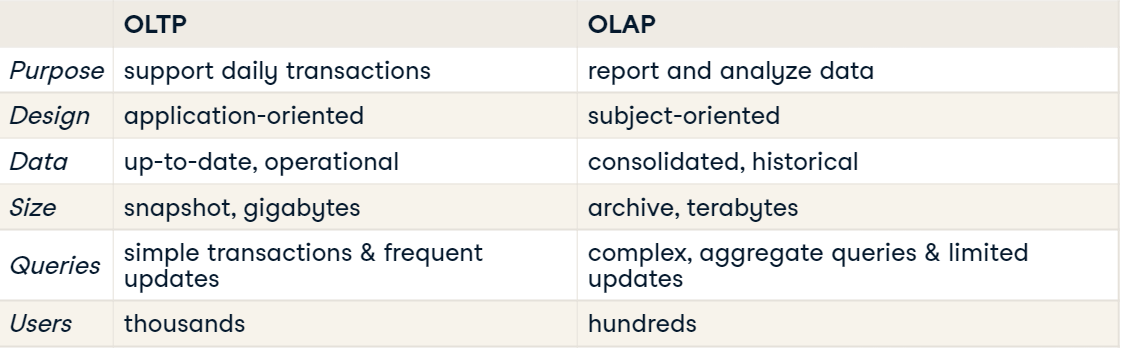

## Data warehouses

**Data warehouses:** 
- Optimized for analytics -**OLAP**
    - Organized for reading/aggregating data
    - Usually read-only
- Contains data from multiple sources
- Massively Parallel Processing (MPP)
- Typically uses a denormalized schema and dimensional modeling

**Services:**
- Amazon Redshift
- Google Big Query
- Azure SQL Data Warehouse
    

**Data Mart:**
- Subset of data warehouses
- Dedicates to specific topic

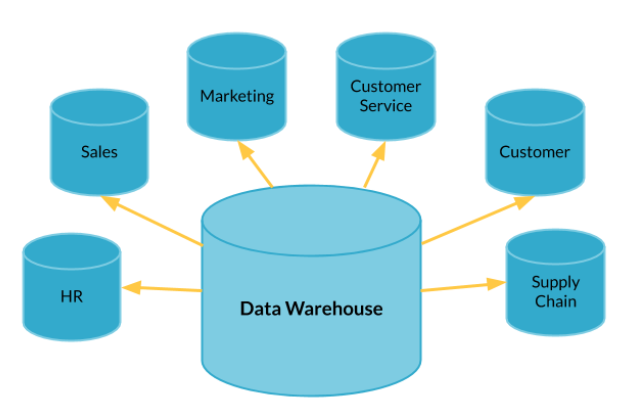

**Data Lakes:** 
- Store all types of data at a lower cost
    - e.g. raw operationl databases, IOT device logs, real-time, relational and non-relational
- Retains all data can take up petabytes (1000 terabytes) of data
- Schema-on-read
- Need to catalog data otherwise become a **data swamp**
- Run **big data analytics** using services such as Apache Spark and Hadoop
    - Useful for deep learning and data discovery

### SQL create a table

In [ ]:
-- Create a route dimension table
CREATE TABLE route(
	route_id INTEGER PRIMARY KEY,
    park_name VARCHAR(160) NOT NULL,
    city_name VARCHAR(160) NOT NULL,
    distance_km FLOAT NOT NULL,
    route_name VARCHAR(160) NOT NULL
);
-- Create a week dimension table
CREATE TABLE week(
	week_id INTEGER PRIMARY KEY,
    week INTEGER NOT NULL,
    month VARCHAR(160) NOT NULL,
    year INTEGER NOT NULL
);

## Star and snowflake schema

**Star Schema**: *made of two tables*
- **Fact tables**
    - Hold records of a metric
    - Changes regularly
    - Connects to dimensions via foreign keys
- **Dimension tables**
    - Holds descriptions of attributes
    - Does not change as often

**Star Schema:** *One dimension* 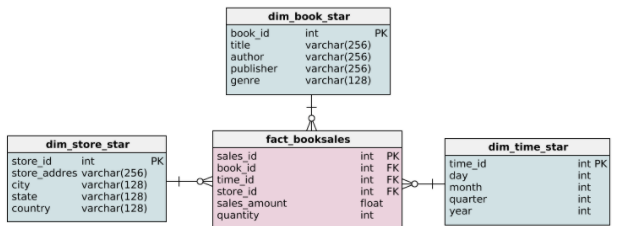

**Snowflake Schema:** *more than one dimension* 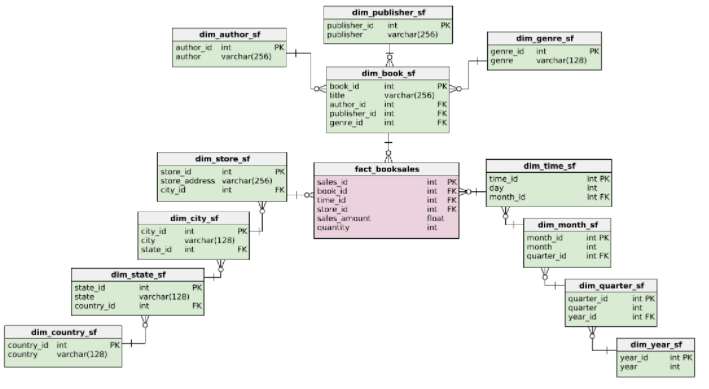

**Normalization:**
- Database design technique
- Divides tables into smaller tables and connects them via relationships
- **Goal:** reduce redundancy and increase data integrity

**Exercise:** The fact_booksales table has three foreign keys: book_id, time_id, and store_id. In this exercise, the four tables that make up the star schema below have been loaded. However, the foreign keys still need to be added.
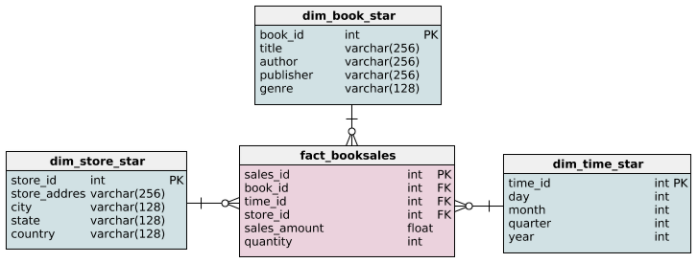


In [ ]:
-- Add the book_id foreign key
ALTER TABLE fact_booksales ADD CONSTRAINT sales_book
    FOREIGN KEY (book_id) REFERENCES dim_book_star (book_id);

**Create a new table, insert something from an existing table, add a primary key**:

In [ ]:
-- Create a new table for dim_author with an author column
CREATE TABLE dim_author (
    author varchar(256)  NOT NULL
);

-- Insert authors 
INSERT INTO dim_author
SELECT DISTINCT author FROM dim_book_star;

-- Add a primary key 
ALTER TABLE dim_author ADD COLUMN author_id SERIAL PRIMARY KEY;

-- Output the new table
SELECT * FROM dim_author;

## Normalized and denormalized databases

**Normalized databases:** saves space but queries are longer since you have to do more joins to get specific data
- Enforces data consistency
- Safer updating, removing, and inserting
    - Less data redundancy = less records to alter
- Easier to redesign by extending
- Smaller tables are easier to extend than larger tables

**Advantages:**
- Normalization eliminates data redundancy: save on storage
- Better data integrity: accurate and consistent data

**Disadvantages:**
- Complex queries require more CPU

**Denormalized databases:** Has data redundancy but queries are faster

**Example Converting to 1NF:**
- cars_rented holds one or more car_ids and invoice_id holds multiple values. Create a new table to hold individual car_ids and invoice_ids of the customer_ids who've rented those cars.
- Drop two columns from customers table to satisfy 1NF

In [ ]:
-- Create a new table to hold the cars rented by customers
CREATE TABLE cust_rentals (
  customer_id INT NOT NULL,
  car_id VARCHAR(128) NULL,
  invoice_id VARCHAR(128) NULL
);

-- Drop column from customers table to satisfy 1NF
ALTER TABLE customers
DROP COLUMN cars_rented,
DROP COLUMN invoice_id;

**Example: Converting to 2NF**
- Create a new table for the non-key columns that were conflicting with 2NF criteria.
- Drop those non-key columns from customer_rentals.

In [ ]:
-- Create a new table to satisfy 2NF
Create table cars (
  car_id VARCHAR(256) NULL,
  model VARCHAR(128),
  manufacturer VARCHAR(128),
  type_car VARCHAR(128),
  condition VARCHAR(128),
  color VARCHAR(128)
);

-- Drop columns in customer_rentals to satisfy 2NF
alter table customer_rentals
Drop Column model,
Drop Column manufacturer, 
Drop Column type_car,
Drop Column condition,
Drop Column color;

## Database views

**Views:** Virtual tables that are not part of a physical schema
- Query, not data, is stored in memory
- Data is aggregated from data in tables
- Can be queried like a regular database table
- No need to retype common queries or alter schemas

**Creating a view (syntax):**

<code>CREATE VIEW view_name AS</code>

<code>SELECT col1, col2
FROM table_name
WHERE condition;</code>

**Viewing views (*In Postgre SQL*):**

- **(*Include system views*)**

<code>SELECT* FROM INFORMATION_SCHEMA.views;</code> 

- **(*Exclude system views*)**

<code>SELECT* FROM INFORMATION_SCHEMA.views;</code>

<code>WHERE table_schema NOT IN ('pg_catalog', 'information_schema');</code>

## Managing views

### Granting and revoking access to a view

<code>GRANT privilege(s)</code> or <code>REVOKE privilege(s)</code>

<code>ON object</code>

<code>TO role</code> or <code>FROM role</code>

- Privileges: <code>SELECT</code>, <code>INSERT</code>, <code>UPDATE</code>, <code>DELETE</code>, etc
- Objects: table, view, schema, etc
- Roles: a database user or a group of database users

**Example:** 
<code>GRANT UPDATE ON ratings TO PUBLIC;</code> #PUBLIC is a SQL term that means all users

<code>REVOKE INSERT ON films db_user;</code>

#### Update a view:

<code>UPDATE films SET kind = 'Dramatic' WHERE kind = 'Drama';</code>

#### Dropping a view

<code>DROP VIEW view_name [ CASCADE | RESTRINCT ];</code>

- **<code>RESTRICT</code>** (default): returns an error if there are objects that depend on the view
- **<code>CASCADE</code>**: drops view and any object that depends on that view

#### Redifining a view
<code>CREATE OR REPLACE VIEW view_name AS new_query</code>


#### Altering a view
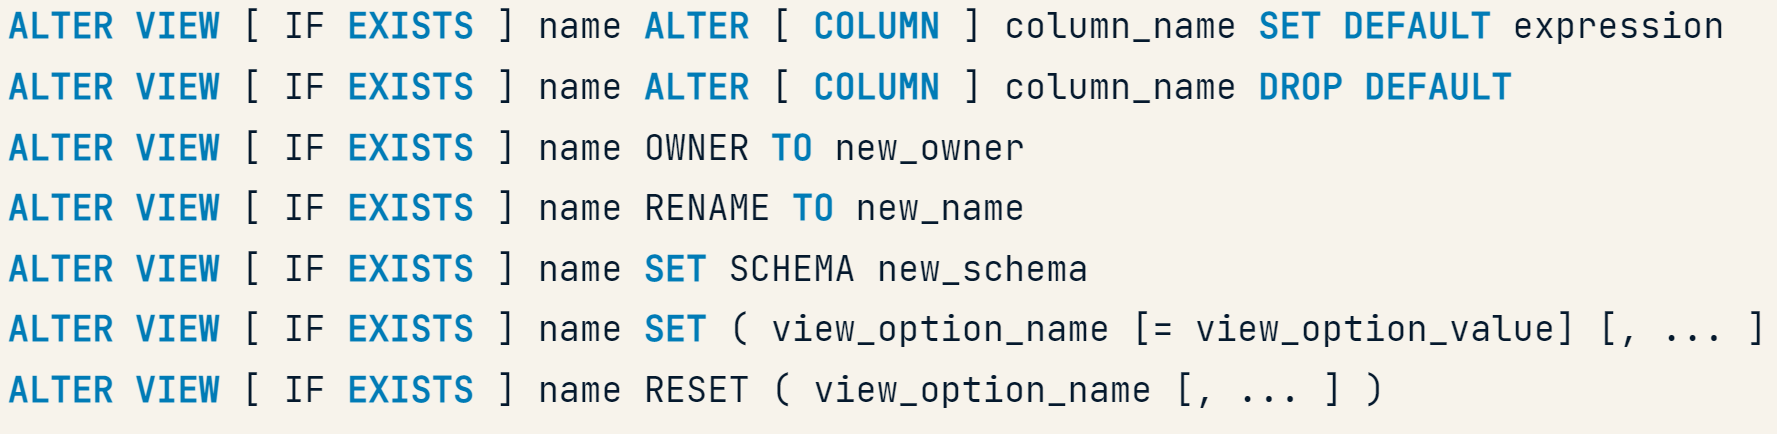

## Materialized views

- Physically materialized views
- Store the --query results**, not the query
- Refreshed or rematerialized when prompted or scheduled


**When to use materialized views**
- Long running queries
- Underlying query results don't change often
- Data warehouses because OLAP is not write-intensive

**Implementing materialized views**

<code>CREATE MATERIALIZED VIEW my_mv AS SELECT * FROM existing_table;</code>

<code>REFRESH MATERIALIZED VIEW my_vm;</code>

## Database roles and access control

**Database roles:**
- Manage database access permissions
- A database role is an entity that contains information that:
    - Define the role's privileges
        - Can you log in ?
        - Can you create databases ?
        - Can you write to tables ?
    - interact with the client authentication system
        - Password
- Roles can be assigned to one or more users
- Roles are global across a database cluster installation

### Create a role

- Empty role

<code>CREATE ROLE data_analyst</code>

- Roles with some attributes set

<code>CREATE ROLE intern WITH PASSWORD 'PasswordForIntern' VALID UNTIL '2020-01-01'</code>

<code>CREATE ROLE admin CREATEDB;</code>

<code>ALTER ROLE admin CREATEROLE;</code>

### GRANT and REVOKE privileges from roles

<code>GRANT UPDATE ON ratings TO data_analyst;</code>
<code>REVOKE UPDATE ON ratings FROM data_analyst</code>

*PostgreSQL available privileges:*
- <code>SELECT, INSERT, UPDATE, DELETE, TRUNCATE, REFERENCES, TRIGGER, CREATE, CONNECT, TEMPORARY, EXECUTE, and USAGE</code>

## Table partition

**Vertical partitioning:**
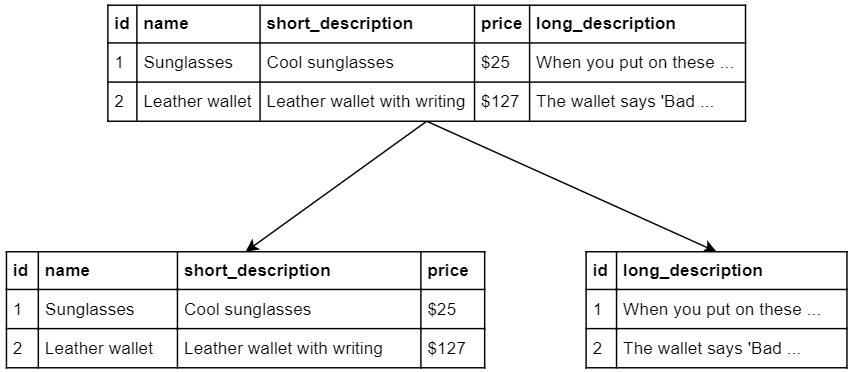

**Horizontal partitioning:** 
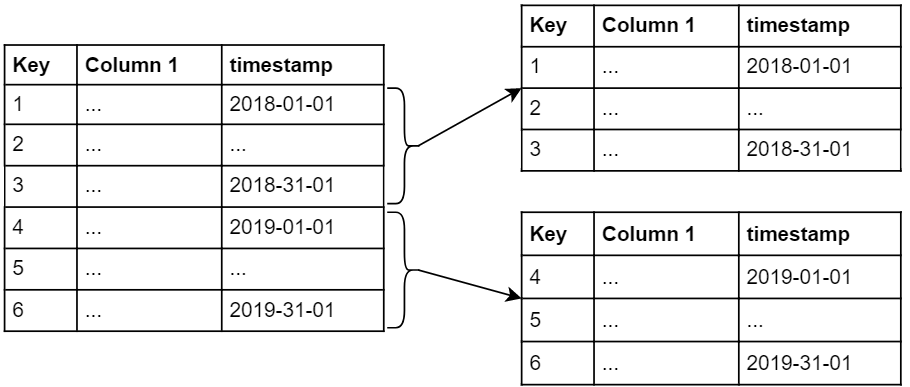

### Example Partitions

**Example: (Creating horizontal partitions)**

In the video, you also learned about horizontal partitioning.

The example of horizontal partitioning showed the syntax necessary to create horizontal partitions in PostgreSQL. If you need a reminder, you can have a look at the slides.

In this exercise, however, you'll be using a list partition instead of a range partition. For list partitions, you form partitions by checking whether the partition key is in a list of values or not.

To do this, we partition by LIST instead of RANGE. When creating the partitions, you should check if the values are IN a list of values.

We'll be using the following columns in this exercise:

- <code>film_id</code>: the unique identifier of the film
- <code>title</code>: the title of the film
- <code>release_year</code>: the year it's released


In [ ]:
-- Create a new table called film_partitioned
CREATE TABLE film_partitioned (
  film_id INT,
  title TEXT NOT NULL,
  release_year TEXT
)
PARTITION BY LIST (release_year);

-- Create the partitions for 2019, 2018, and 2017
CREATE TABLE film_2019
	PARTITION OF film_partitioned FOR VALUES IN ('2019');

CREATE TABLE film_2018
	PARTITION OF film_partitioned FOR VALUES IN ('2018');

CREATE TABLE film_2017
	PARTITION OF film_partitioned FOR VALUES IN ('2017');

-- Insert the data into film_partitioned
INSERT INTO film_partitioned
SELECT film_id, title, release_year FROM film;

-- View film_partitioned
SELECT * FROM film_partitioned;

## Data integration

**Data integration combines data from different sources, formats, technologies to provide users with a translated and unified view of that data.**

## DBMS Database Management System

- Create and maintain databases
    - Data
    - Database schema
    - Database engine
- interface between database and end users
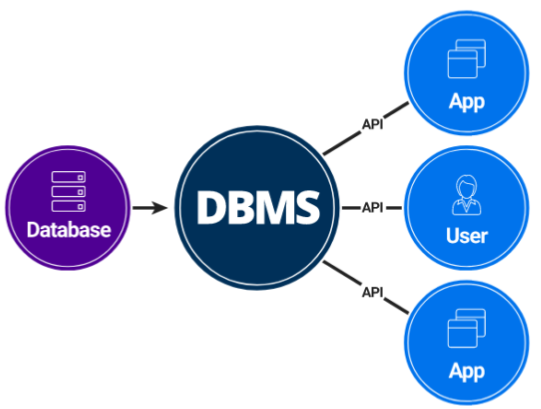

### DMBS Types

- **SQL DMBS**
- **NoSQL DMBMS**

**SQL DBMS**
- Relational DataBase Management System (RDBMS)
- Based on the relational model of data
- Query language: SQL
- Best option when:
    - Data is structured and unchanging
    - Data must be consistent

**NoSQL DBMS**
- Less structured
- Document_centered rather than table-centered
- Data doesn't have to fit into well-defined rows and columns
- Best option when:
    - Rapid growth
    - No clear schema definitions
    - Large quantities of data
- Types: key-value store, document store, columnar database, graph database

# PostgreSQL Exercises

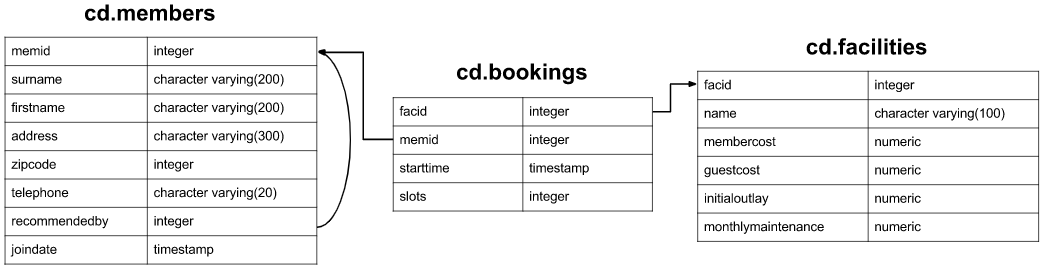

## Basic

### IF statement (case when)

How can you produce a list of facilities, with each labelled as 'cheap' or 'expensive' depending on if their monthly maintenance cost is more than $100? Return the name and monthly maintenance of the facilities in question.

In [ ]:
Select		name,
                case when (monthlymaintenance >100) then
                    'expensive'
                else
                    'cheap'
                end as cost

    From cd.facilities

### Removing duplicates, and ordering results

How can you produce an ordered list of the first 10 surnames in the members table? The list must not contain duplicates.


In [ ]:
select	distinct(surname) #no duplicates

    from cd.members

order by surname
limit 10; #limit to 10 names

### Combining results from multiple queries

You, for some reason, want a combined list of all surnames and all facility names. Yes, this is a contrived example :-). Produce that list!

In [ ]:
select surname
    from cd.members

union
select name
    from cd.facilities

### Simple aggregation

You'd like to get the signup date of your last member. How can you retrieve this information?

In [ ]:
select	joindate as latest

    from cd.members

order by joindate DESC

limit 1;
    
#other example of aggregation 

select firstname, surname, joindate

        from cd.members

order by joindate desc

limit 1;

## Join and subqueries

### inner join

In [ ]:
SELECT	bks.starttime

	FROM	cd.bookings bks
			inner join cd.members mems
				on mems.memid = bks.memid
				
	WHERE
			mems.firstname = 'David'
			and mems.surname = 'Farrell';

### Self join

In [ ]:
SELECT	DISTINCT recommended_mems.firstname as firstname, recommended_mems.surname as surname
	
	FROM
			cd.members mems
			inner join cd.members recommended_mems
				ON recommended_mems.memid = mems.recommendedby
				
ORDER BY surname, firstname 
	


### Left Outer join

How can you output a list of all members, including the individual who recommended them (if any)? Ensure that results are ordered by (surname, firstname)

In [ ]:
select	mems.firstname as memfname, mems.surname as memsname, recomems.firstname as recfname, recomems.surname as recsname

	from cd.members mems
	
	left outer join cd.members recomems on
	recomems.memid = mems.recommendedby
	
order by memsname, memfname

### Double Join

In [ ]:
select distinct mems.firstname || ' ' || mems.surname as member, facs.name as facility # Operators '||' used to concat strs
	from 
		cd.members mems
		inner join cd.bookings bks
			on mems.memid = bks.memid
            
		inner join cd.facilities facs
			on bks.facid = facs.facid
	where
		facs.name in ('Tennis Court 2','Tennis Court 1')
order by member, facility       

### Case when (if)

In [ ]:
SELECT	mems.firstname || ' ' || mems.surname as member, facs.name as facility,


	case
	
		when 	mems.memid = 0 then
				bks.slots*facs.guestcost
		else
				bks.slots* facs.membercost
				
	end as cost

from	
		cd.members as mems
		inner join cd.bookings bks
			on mems.memid = bks.memid
			
		inner join cd.facilities facs
			on bks.facid = facs.facid
			
where	
		bks.starttime >= '2012-09-14' and
		bks.starttime < '2012-09-15' and (
		  	(mems.memid = 0 and bks.slots*facs.guestcost > 30) or
		  	(mems.memid != 0 and bks.slots*facs.membercost > 30)
		  )

			
order by cost desc
		


### Subqueries

In [ ]:
select distinct mems.firstname || ' ' || mems.surname as member,
		(select recs.firstname || ' ' || recs.surname as recommender
		 	from cd.members recs
			where recs.memid = mems.recommendedby
		 )
		 
		 from cd.members mems
		 
order by member;

The Produce a list of costly bookings exercise contained some messy logic: we had to calculate the booking cost in both the WHERE clause and the CASE statement. Try to simplify this calculation using subqueries. For reference, the question was:
How can you produce a list of bookings on the day of 2012-09-14 which will cost the member (or guest) more than $30? Remember that guests have different costs to members (the listed costs are per half-hour 'slot'), and the guest user is always ID 0. Include in your output the name of the facility, the name of the member formatted as a single column, and the cost. Order by descending cost.

In [ ]:
select	member, facility, cost from(
  
  		select 	
  				mems.firstname || ' ' || mems.surname as member,
  				facs.name as facility,
  
		 		case
					when 	mems.memid = 0 then
							bks.slots*facs.guestcost
		  
					else	bks.slots*facs.membercost
				end as cost


				from	cd.members mems
						inner join cd.bookings bks
							on bks.memid = mems.memid
						inner join cd.facilities facs
							on facs.facid = bks.facid
  
  		where 	bks.starttime >= '2012-09-14' and
  				bks.starttime < '2012-09-15'
				  ) as bookings
  
  		where cost > 30
order by cost desc;

## Modifying data

### Insert data into a table

In [ ]:
insert into cd.facilities
	(facid, name, membercost, guestcost, initialoutlay, monthlymaintenance)
	values(9,'Spa',20,30,100000,800)